In [1]:
import pandas as pd
import numpy as np
np.random.seed(1)

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams['figure.figsize'] = 20, 13
plt.rcParams['font.size'] = 20
plt.rcParams['lines.linewidth'] = 2
import seaborn as sns
import tikzplotlib

import sys
sys.path.insert(0, '../../..')
import kde_utils

In [2]:
df = pd.read_csv('../../../data/data.csv', index_col=0)
types = ['ES', 'TH', 'RRH', 'PREV']
df = df[df['Real'] != 2]
df = df.drop(labels='PSH', axis=1)

data = df[types].to_numpy().flatten()
kde = kde_utils.KDEHelper(np.log(data) - np.log(1 - data))

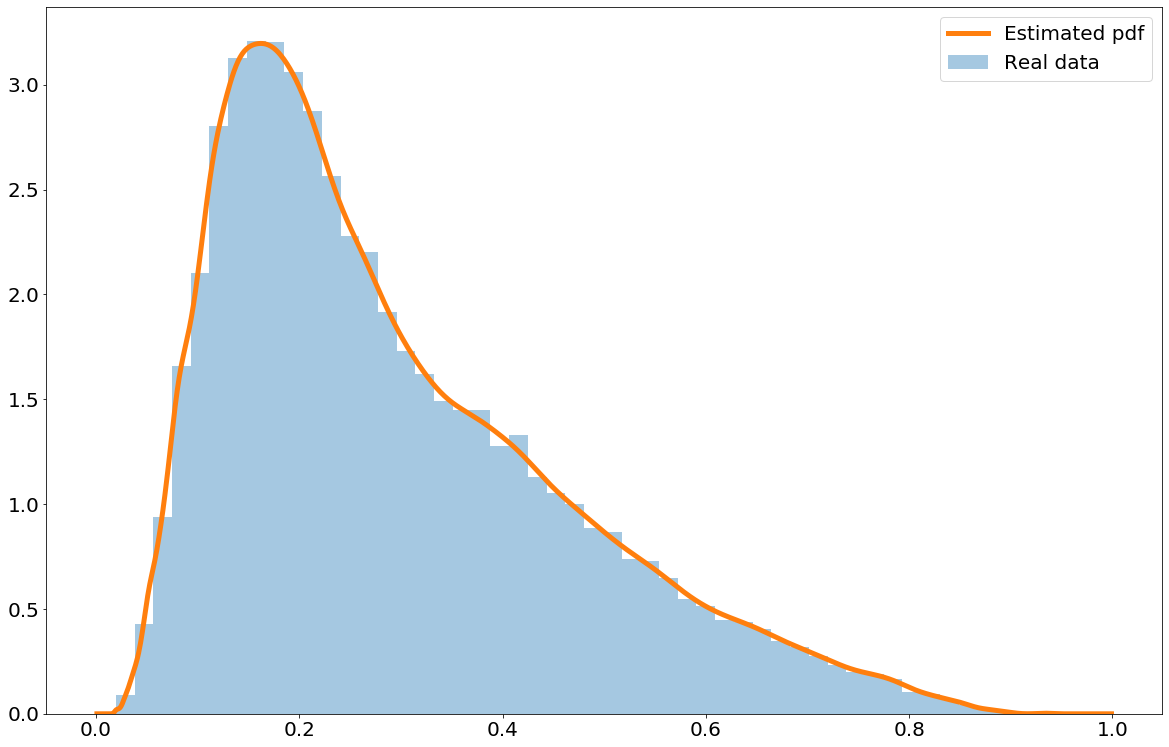

In [7]:
plt.hist(data, bins=50, alpha=0.4, label='Real data', density=True)

xs = np.linspace(0, 1, 1002)[1: -1].reshape(-1, 1)
plt.plot(xs, kde.get_transformed_pdf(xs), label='Estimated pdf', linewidth=5)

plt.legend()

tikzplotlib.save('kde_vs_hist.tex')